In [1]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function
# Inline interactive figures
%matplotlib nbagg

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<center>
<h1>Introduction to the SciPy Ecosystem</h1>

<p class="gap05"<p>
<h3>Ben Root</h3>
<h3>ben.v.root@gmail.com</h3>
<h3>Atmospheric and Environmental Research, Inc.</h3>
<h5>[Jupyter Notebook](http://nbviewer.jupyter.org/github/WeatherGod/SciPyEcosystem/blob/master/Scipy_Ecosystem_Slideshow.ipynb)</h5>
</center>

# Who am I?
- B.S. & M.S. in Meteorology from Penn State
 - Perl, C/C++, Matlab & a terrible language called GrADS
 - Linux and Vim

- Spent 5 years on a PhD at the University of Oklahoma
 - Had problems with Matlab
 - Tried Matplotlib & Python
 - Posted patches to the various mailing lists

- Matplotlib Developer
 - John Hunter of Matplotlib said I annoyed him enough
 - Gave me commit rights!
 - Personally managed the v1.1.0 release of Matplotlib
 - Active on the matplotlib mailing list

- The matplotlib mailing list is directly responsible for two things:
 1. Me not finishing my dissertation
 2. Current job
   - [How matplotlib got me a job](http://matplotlib.1069221.n5.nabble.com/How-matplotlib-got-me-a-job-td27470.html)
   - tl;dr: answer questions on mailing lists, you never know if the person you are helping out will be your next
     co-worker!

- Author
 - [The Anatomy of Matplotlib Tutorial](https://github.com/WeatherGod/AnatomyOfMatplotlib)
 - [Interactive Applications using Matplotlib](http://www.amazon.com/Interactive-Applications-using-Matplotlib-Benjamin/dp/1783988843/ref=tmm_pap_title_0)

- SciPy Conference Co-chair
 - Financial Aid (2015)
 - Tutorials (2016)

- Scientific Programmer at [Atmospheric and Environmental Research, Inc.](http://www.aer.com)

# Who uses SciPy?
- USGS
- Los Alamos National Laboratory
- [`LIGO`](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html)
- Autodesk
- Kitware
- Microsoft Azure
- Bloomberg
- Amazon

# NumPy <img src="numpy.svg" style="float:right;height:200px"/>
- The numerical N-dimensional array class
- Provides basic math & array methods
- Lays the foundation for SciPy ecosystem
- Completely different from Python's `array`
  - `array` is geared towards having a compact form of lists (great for buffers)
  - NumPy is for math

In [3]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- Implemented mostly in C
  - Just a C-pointer with lots of dressing!
  - Interfaces with many existing numerical tools
  - Fast

In [4]:
a = list(range(10000))
%timeit [v ** 2 for v in a]

100 loops, best of 3: 3.65 ms per loop


In [5]:
b = np.array(a)
%timeit b ** 2

The slowest run took 7.91 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.49 µs per loop


## Array Indexing

In [6]:
x = np.arange(100).reshape(5, 20)
# Simple Indexing
print(x[2])

[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]


In [7]:
# Slicing
print(x[2:5])

[[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [8]:
# Boolean Indexing (always a 1-D result)
print(x[(x % 2) == 0])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98]


In [9]:
# Fancy Indexing -- Note the use of a list, not tuple!
print(x[[1, 4, 2]])

[[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]]


Learn more of the basics at [Introduction to NumPy](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part0-Intro2NumPy.ipynb)

# Matplotlib <img src="matplotlib.png" style="float:right;height:250px">
  - Cross-platform, interactive-capable, scientific plotting tool
  - In science, visualizing data is paramount
  - Tables suck
  - A picture is worth a thousand words

  - An interactive plot in 3 lines

<IPython.core.display.Javascript object>


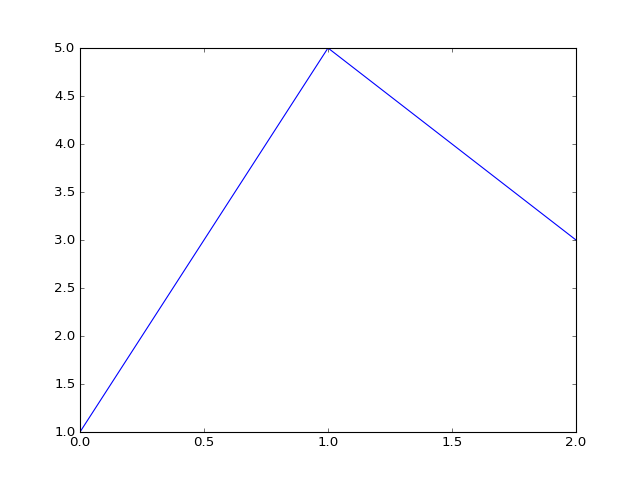

In [10]:
import matplotlib.pyplot as plt
plt.plot([1, 5, 3])
plt.show()

  - Not stupidly unhelpful or obtrusive.
  - Have control over as much or as little detail as you want
  - [Wide assortments of plot types](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part2-Plotting_Methods_Overview.ipynb)
  - Acts as an abstraction library to many GUI toolkits
  - [Interactive Applications using Matplotlib](http://www.amazon.com/Interactive-Applications-using-Matplotlib-Benjamin/dp/1783988843/ref=tmm_pap_title_0)

# SciPy <img src="scipy_med.png" style='float:right;width:200px'>
 - Goes beyond basic math algorithms
 - Has general algorithms that apply to many domains
   - `constants`
   - `cluster`
   - `fftpack`
   - `integrate`

   - `interpolate`

In [11]:
from scipy import interpolate
x, y = np.linspace(-5, 5, 25), np.linspace(-5, 5, 25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f_rect = interpolate.RectBivariateSpline(x, y, z)

xnew, ynew = np.linspace(-4.5, 4.5, 1000), np.linspace(-4.5, 4.5, 1000)
znew = f_rect(xnew, ynew)

<IPython.core.display.Javascript object>


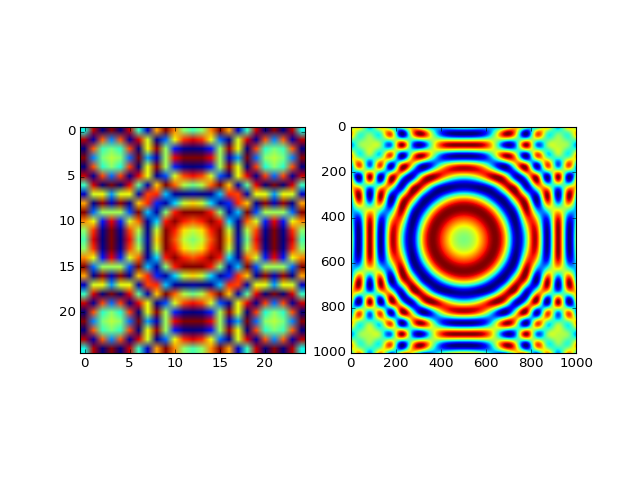

In [12]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(z, vmin=-1, vmax=1)
axes[1].imshow(znew, vmin=-1, vmax=1)

   - `io`
     - Support for some scientific data formats
     - This used to be essential before pypi
     - matlab, fortran, netcdf3, arff, IDL, wav
   - `ndimage`
     - Convolutions, filters, transforms
     - `measurements`  (stats on labeled pixels)
     - `morphology`  (erosion, dilation, etc.)
     - For advanced features, see [`scikit-image`](http://scikit-image.org)

# Pineapple Express

In [13]:
n_stores = 5
n_customers = 500
stores = np.random.random((n_stores, 2)) * 400
customers = np.random.random((n_customers, 2)) * 400
threshold = 200

In [17]:
#%%timeit
d = np.hypot(stores[:, 0][:, np.newaxis] -
             customers[:, 0][np.newaxis, :],
             stores[:, 1][:, np.newaxis] -
             customers[:, 1][np.newaxis, :])
indexes = np.argmin(d, axis=0)
d = d[indexes, np.arange(len(indexes))]
d[d > threshold] = np.inf
indexes[np.isinf(d)] = len(indexes)
rev_indexes = [np.where(indexes == store_i)for store_i in range(len(stores))]

<IPython.core.display.Javascript object>


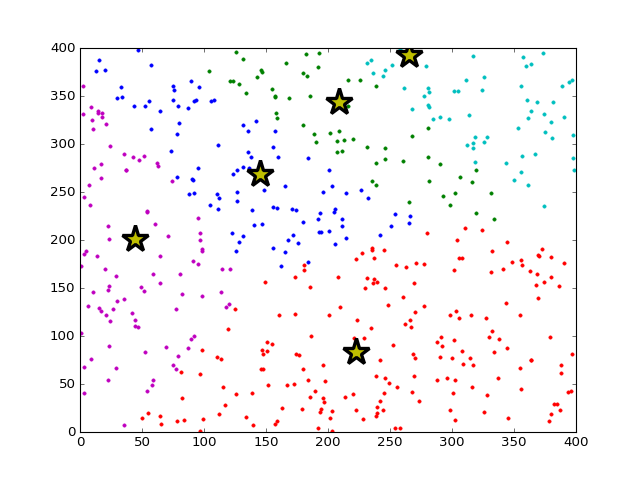

In [18]:
fig, ax = plt.subplots()
for inds, in rev_indexes:
    ax.plot(customers[inds, 0], customers[inds, 1], '.')
ax.plot(stores[:, 0], stores[:, 1], '*y', markersize=25,
        mec='k', mew=3)

   - `spatial`

In [19]:
from scipy.spatial import cKDTree as KDTree

In [21]:
%%timeit
store_tree = KDTree(stores)
d, indexes = store_tree.query(customers,
                              distance_upper_bound=threshold)
rev_indexes = [np.where(indexes == store_i)
               for store_i in range(len(stores))]    

1000 loops, best of 3: 322 µs per loop


   - `stats`
     - More statistics distributions than you can shake a stick at.
     - Generate random data from a distribution
     - Fit your data to a chosen distribution
     - Check out [statsmodels](http://statsmodels.sourceforge.net/) package
       for even more statistics fun.

   - `special`
     - If you ever get a requirement to use a function with a French,
       German, or Russian-sounding name, check in here.
     - Also, when scientists talk of Lambda functions, it is usually
       not the Python `lambda`. Find it here.

# IPython / Jupyter
<img src="ipython.png" style="float:right;height:160px"><img src="jupyter.svg" style="float:right;height:160px">
  - "Weaponize your tab"
  - Paste multi-line code snippets into a REPL
  - Notebooks are for sharing code examples with results
  - Makes it easy to experiment
  - Not intended to replace the debugger or be an IDE
  - More like a sandbox

# Anaconda/miniconda
  - A "python" distribution from [Continuum Analytics](http://continuum.io)
  - `distutils`/`setuptools` isn't good enough for the SciPy community
  - This isn't to knock on these tools, but scientists have developed
    very useful tools that are not packaged through `pip`, and may
    have fragile binary dependency requirements.

  - So, why not use yum/apt-get/macports/homebrew?
  - Scientists love experimenting, but *hate* when things break
  - We also hate waiting for IT to install packages
  - `conda` is user-space package management with environments
  - Dynamic library linkages are at the user-space level
  - IT can update systems without breaking things

# The rest of the ecosystem
## Visualization <img src='cartopy.png' style='float:right;height:200px'>
  - [`bokeh`](http://bokeh.pydata.org/en/latest/)
  - [`seaborn`](https://stanford.edu/~mwaskom/software/seaborn/)
  - [`cartopy`](http://scitools.org.uk/cartopy/)
  - [`ggplot`](http://ggplot.yhathq.com/)
  - [`descartes`](https://bitbucket.org/sgillies/descartes/)
  - [`mayavi`](http://code.enthought.com/projects/mayavi/)
  - [`vispy`](http://vispy.org) & [`glumpy`](https://glumpy.github.io/)

## Do more with arrays <img src='pydata.png' style='float:right;height:200px'>
  - [`pandas`](http://pandas.pydata.org/)
  - [`xarray`](http://xarray.pydata.org/)
  - [`pytables`](http://pytables.org/)
  - [`ibis`](http://www.ibis-project.org/)
  - [`odo`](http://odo.readthedocs.org/en/latest/)
  - [`blaze`](http://blaze.readthedocs.org/en/latest/index.html)
  - [`pint`](https://pint.readthedocs.org)

In [22]:
from scipy import constants
import pint
ureg = pint.UnitRegistry()
m = 10 * ureg.kg
c = constants.c * ureg.meters / ureg.second
E = m*c**2
print(E)

ImportError: No module named 'pint'

## Python with rockets <img src='cython.png' style='float:right;height:200px'>
  - [`cython`](http://cython.org/)
  - [`numba`](http://numba.pydata.org/)
  - [`numexpr`](https://github.com/pydata/numexpr)
  - [`dask`](http://dask.pydata.org/en/latest/)
  - [`theano`](http://deeplearning.net/software/theano/)

In [23]:
def pyprimes(kmax):
    p = [0] * 1000
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

In [24]:
%load_ext cython

In [25]:
%%cython
def cprimes(int kmax):
    cdef int n, k, i
    cdef int p[1000]
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

In [26]:
%timeit pyprimes(500)
%timeit cprimes(500)

10 loops, best of 3: 30.3 ms per loop
1000 loops, best of 3: 542 µs per loop


## Symbolic Math <img src='sympy_logo.png' style='float:right;height:200px'>
  - [`sympy`](http://sympy.org/)
  - [`sage`](http://www.sagemath.org/)
  - [`patsy`](http://patsy.readthedocs.org/en/latest/index.html)

## Geographic Processing
  - GDAL/OGR  (`osgeo.ogr` & `osgeo.osr`)
  - [`fiona`](http://toblerity.org/fiona/)
  - [`geopandas`](http://geopandas.org/)
  - [`shapely`](http://toblerity.org/shapely/)
  - [`pyproj`](http://jswhit.github.io/pyproj/)
  - [`geopy`](https://geopy.readthedocs.io/)

In [27]:
from shapely.geometry import Point
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
c = a.intersection(b)

ImportError: No module named 'shapely'

In [28]:
from descartes import PolygonPatch 
fig, ax = plt.subplots()
ax.set_xlim(-1, 4); ax.set_ylim(-1, 3)
for p, color in zip([a, b, c], 'rcy'):
    ax.add_patch(PolygonPatch(p, fc=color))

ImportError: No module named 'descartes'

## Scientific Data Formats <img src='logo-pytables-small.png' style='float:right;height:100px'>
  - [`netCDF4`](http://unidata.github.io/netcdf4-python/)
  - [`pytables`](http://pytables.org)
  - [`h5py`](http://www.h5py.org/)
  - [`PyNIO`](https://www.pyngl.ucar.edu/Nio.shtml)
  - GDAL (`osgeo.gdal`)
  - [`rasterio`](https://github.com/mapbox/rasterio)

## Domain Specialties <img src='scikit-image.png' style='float:right;height:100px'>
  - [`scikit-image`](http://scikit-image.org)
  - [`scikit-learn`](http://scikit-learn.org/stable/)
  - [`astropy`](http://astropy.org)
  - [`statsmodels`](http://statsmodels.sourceforge.net/)
  - [`metpy`](https://github.com/MetPy/MetPy)
  - [`pyart`](http://arm-doe.github.io/pyart/)

# Recommended Reading
- [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do): Wes Mckinney
- [Cython - A Guide for Python Programmers](http://shop.oreilly.com/product/0636920033431.do): Kurt Smith
- [Effective Computation in Physics - Field Guide to Research with Python](http://shop.oreilly.com/product/0636920033424.do): Anthony Scopatz & Katy Huff
- [Mastering Matplotlib](http://www.amazon.com/dp/1783987545/ref=pd_lpo_sbs_dp_ss_1?pf_rd_p=1944687622&pf_rd_s=lpo-top-stripe-1&pf_rd_t=201&pf_rd_i=1783988843&pf_rd_m=ATVPDKIKX0DER&pf_rd_r=0SB7JQVV0V78AWESMCEB): Duncan McGreggor

# Final Thoughts
  - This is but a taste of what is out there
  - Biology is one domain not covered here
  - Love the co-operative nature of the SciPy community
  - Projects complement each other and "stand on the shoulders of giants"
  - Teaching scientists how to program: [Software Carpentry](software-carpentry.org)